In [36]:
import warnings
from shapely.errors import ShapelyDeprecationWarning

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["font.family"] = "Arial"
from shapely.geometry import *
from sqlalchemy import create_engine

# from config import DB_PW
from scrollstats import BendDataset
from scrollstats import calculate_ridge_metrics
from scrollstats import RidgeDataExtractor as RDE
from scrollstats import TransectDataExtractor as TDE
from scrollstats import explode

In [2]:
bend_id = "BEA_002"
bend_ds = BendDataset(bend_id)
transects = bend_ds.get_transects(proj=True)
ridges = bend_ds.get_ridges(proj=True)
centerline = bend_ds.get_centerline(proj=True)
bounds = bend_ds.get_bend(proj=True)

In [3]:
# river_id = 4
# bend_id = "BEA_002"
# dem = rasterio.open("/Users/avan/FLUD/BrazosScrolls/data/raster/dem/sb_1_025_clip.tif")
# bin_raster = rasterio.open("/Users/avan/FLUD/BrazosScrolls/data/r10/agreement-clip-denoise/sb_1_025_agreement_45px_binclass_clip_dn_Buff100m_SmFt500m_ET80p.tif")

# transects = gpd.GeoDataFrame.from_postgis(f"SELECT * FROM transects WHERE bend_id='{bend_id}'", engine, geom_col="geometry")
# transects = transects.to_crs(transects.estimate_utm_crs())

# ridges = gpd.GeoDataFrame.from_postgis(f"SELECT * FROM ridges WHERE bend_id='{bend_id}'", engine, geom_col="geometry")
# ridges = ridges.to_crs(ridges.estimate_utm_crs())

# centerline = gpd.GeoDataFrame.from_postgis(f"SELECT * FROM centerlines WHERE river_id={river_id}", engine, geom_col="geometry")
# centerline = centerline.to_crs(centerline.estimate_utm_crs())

# bounds = gpd.GeoDataFrame.from_postgis(f"SELECT * FROM bends WHERE bend_id='{bend_id}'", engine, geom_col="geometry")
# bounds = bounds.to_crs(bounds.estimate_utm_crs())

# data_source = pd.read_sql(f"SELECT * FROM data_sources WHERE data_source_id={int(bounds.data_source_id)}", engine)


In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ShapelyDeprecationWarning)
    rich_transects, itx = calculate_ridge_metrics(transects, in_ridges=ridges)
rich_transects.head()

Started BDE
Started TDE for t_003
Started RDE
Started RDE
Started TDE for t_004
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_005
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_006
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_007
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_008
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_009
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_010
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_011
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_012
Started RDE


,transect_id,bend_id,cl_distance,length,num_coords,shoot_distance,search_distance,dev_from_90,geometry,r_000,r_001,r_002,r_003,r_004,r_005,r_006,r_007,r_008,r_009,r_010
0,t_003,BEA_002,163.406345,127.125193,4,100,200,5,"LINESTRING (586682.576 6350518.595, 586701.571...",NaN,126.179846,91.796215,51.792766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,t_004,BEA_002,216.593430,223.196769,6,100,200,5,"LINESTRING (586734.472 6350533.202, 586753.940...",222.281035,174.764103,139.538563,101.086571,60.970770,NaN,NaN,NaN,NaN,NaN,NaN
2,t_005,BEA_002,269.644489,264.639754,8,100,200,5,"LINESTRING (586788.409 6350532.670, 586809.315...",264.578093,219.339047,178.470006,144.020046,105.306824,84.521239,66.582057,NaN,NaN,NaN,NaN
3,t_006,BEA_002,323.030484,270.085696,9,100,200,5,"LINESTRING (586838.528 6350513.685, 586812.567...",271.069559,226.763104,183.634032,150.854819,113.210450,90.162128,73.969533,NaN,34.810055,NaN,NaN
4,t_007,BEA_002,377.136891,255.775948,10,100,200,5,"LINESTRING (586878.216 6350476.988, 586846.465...",258.328116,214.368097,170.442949,138.334310,101.119029,77.443123,61.401979,NaN,46.658079,38.120052,NaN


In [5]:
itx.head()

start_distances  transect_position  \
bend_id transect_id ridge_id                                       
BEA_002 t_003       r_002           51.792766                  1   
                    r_003            0.000000                  0   
        t_004       r_001          139.538563                  3   
                    r_002          101.086571                  2   
                    r_003           60.970770                  1   

                              metric_confidence  \
bend_id transect_id ridge_id                      
BEA_002 t_003       r_002                     0   
                    r_003                     0   
        t_004       r_001                     0   
                    r_002                     0   
                    r_003                     0   

                                                      relative_vertex_distances  \
bend_id transect_id ridge_id                                                      
BEA_002 t_003       r_002        [0.41046781913048147, 0.7275029834843594, 1.0]   
                    r_003        [0.0, 0.41046781913048147, 0.7275029834843594]   
        t_004       r_001         [0.6277573933788188, 0.7862303803857502, 1.0]   
                    r_002     [0.4547692105309566, 0.6277573933788188, 0.786...   
                    r_003     [0.27429586947630424, 0.4547692105309566, 0.62...   

                             vertex_indices dem_signal dem_signal_selection  \
bend_id transect_id ridge_id                                                  
BEA_002 t_003       r_002               NaN        NaN                 None   
                    r_003               NaN        NaN                 None   
        t_004       r_001               NaN        NaN                 None   
                    r_002               NaN        NaN                 None   
                    r_003               NaN        NaN                 None   

                             bin_signal bool_mask  pre_mig_dist  ...  \
bend_id transect_id ridge_id                                     ...   
BEA_002 t_003       r_002           NaN      None     34.383632  ...   
                    r_003           NaN      None     40.003448  ...   
        t_004       r_001           NaN      None     47.516932  ...   
                    r_002           NaN      None     35.225540  ...   
                    r_003           NaN      None     38.451992  ...   

                              pre_mig_time  post_mig_time  pre_mig_rate  \
bend_id transect_id ridge_id                                              
BEA_002 t_003       r_002             20.0           20.0      1.719182   
                    r_003             20.0            NaN      2.000172   
        t_004       r_001             60.0           20.0      0.791949   
                    r_002             20.0           20.0      1.761277   
                    r_003             20.0           43.0      1.922600   

                              post_mig_rate  ridge_width  ridge_amp  \
bend_id transect_id ridge_id                                          
BEA_002 t_003       r_002          2.000172          NaN        NaN   
                    r_003               NaN          NaN        NaN   
        t_004       r_001          1.761277          NaN        NaN   
                    r_002          1.922600          NaN        NaN   
                    r_003          0.932926          NaN        NaN   

                              deposit_year  \
bend_id transect_id ridge_id                 
BEA_002 t_003       r_002           1755.0   
                    r_003           1775.0   
        t_004       r_001           1735.0   
                    r_002           1755.0   
                    r_003           1775.0   

                                                             substring_geometry  \
bend_id transect_id ridge_id                                                      
BEA_002 t_003       r_002     LINESTRING 

<AxesSubplot:>

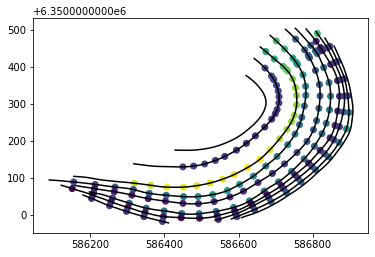

In [6]:
fig, ax = plt.subplots()

ridges.plot(ax=ax, color="k")
itx.plot(ax=ax, column="pre_mig_rate")

In [7]:
rich_transects["r_001_norm"] = rich_transects["r_001"]/ np.nanmin(rich_transects["r_001"])

Text(0.5, 1.0, 'Migration Rate on BEA_002')

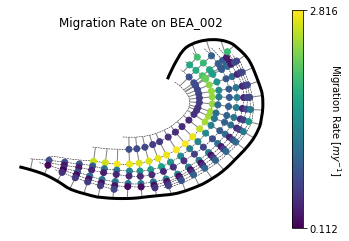

In [8]:
fig, ax = plt.subplots(figsize=(6,4))

ridges.plot(ax=ax, color="k", ls="--", lw=0.5)

rich_transects.plot(ax=ax, color="grey", lw=1)
itx.plot(ax=ax, column="pre_mig_rate", zorder=2,legend=True)
centerline.plot(ax=ax, color="k", lw=3)

cbar = fig.axes[1]
cbar.set_yticks(itx["pre_mig_rate"].quantile([0,1]))
cbar.set_ylabel("Migration Rate [$my^{-1}$]", rotation=270)

ax.set_axis_off()
ax.set_title("Migration Rate on BEA_002")
# plt.savefig("/Users/avan/FLUD/BrazosScrolls/figures/MigrationRate_BEA_002.png", dpi=300)

# Break up the transects into mini 2 vertex line strings

In [9]:
def substring_gdf(line, transect_id, ridges):
    """Create a gdf for each 2v linestring within the given linestring"""

    # Get all substrings
    subs = explode(line)
    # Create gdf and set basic values
    sub_gdf = gpd.GeoDataFrame({"2v_geometry":subs}, geometry="2v_geometry", crs=ridges.crs)
    sub_gdf["transect_id"] = transect_id

    # Get and buffer the first/last points for spatial join with ridges
    sub_gdf["first_point_buff"] = sub_gdf["2v_geometry"].apply(lambda x: Point(x.coords[0])).buffer(1e-5)
    sub_gdf["last_point_buff"] = sub_gdf["2v_geometry"].apply(lambda x: Point(x.coords[1])).buffer(1e-5)
    sub_gdf = sub_gdf.set_geometry("first_point_buff")

    # Perform spatial join and clean up result
    sub_gdf = sub_gdf.sjoin(ridges, how="left")
    sub_gdf = sub_gdf[[col for col in sub_gdf.columns if not col.startswith("index")]]
    sub_gdf.ridge_id.fillna("cl", inplace=True)
    # sub_gdf = sub_gdf.set_index(["transect_id", "ridge_id"])

    return sub_gdf

In [10]:
s = transects[["geometry", "transect_id"]].apply(lambda x: substring_gdf(x["geometry"], x["transect_id"], ridges), axis=1)
mega_sub_gdf = pd.concat(s.values).set_index(["transect_id", "ridge_id"])
mega_sub_gdf.head()
# mega_sub_gdf.set_geometry("2v_geometry")[["deposit_year"]]

2v_geometry  \
transect_id ridge_id                                                      
t_003       cl        LINESTRING (586682.576 6350518.595, 586701.571...   
            r_003     LINESTRING (586701.571 6350470.411, 586673.560...   
            r_002     LINESTRING (586673.560 6350441.851, 586650.309...   
t_004       cl        LINESTRING (586734.472 6350533.202, 586753.940...   
            r_004     LINESTRING (586753.940 6350475.423, 586723.952...   

                                                       first_point_buff  \
transect_id ridge_id                                                      
t_003       cl        POLYGON ((586682.576 6350518.595, 586682.576 6...   
            r_003     POLYGON ((586701.571 6350470.411, 586701.571 6...   
            r_002     POLYGON ((586673.560 6350441.851, 586673.560 6...   
t_004       cl        POLYGON ((586734.473 6350533.202, 586734.473 6...   
            r_004     POLYGON ((586753.940 6350475.423, 586753.940 6...   

                                                        last_point_buff  \
transect_id ridge_id                                                      
t_003       cl        POLYGON ((586701.571 6350470.411, 586701.571 6...   
            r_003     POLYGON ((586673.560 6350441.851, 586673.560 6...   
            r_002     POLYGON ((586650.309 6350416.520, 586650.309 6...   
t_004       cl        POLYGON ((586753.940 6350475.423, 586753.940 6...   
            r_004     POLYGON ((586723.952 6350448.777, 586723.952 6...   

                      bend_id  deposit_year  
transect_id ridge_id                         
t_003       cl            NaN           NaN  
            r_003     BEA_002        1775.0  
            r_002     BEA_002        1755.0  
t_004       cl            NaN           NaN  
            r_004     BEA_002        1818.0

In [11]:
# mega_sub_gdf.set_geometry("2v_geometry").reset_index()[["transect_id", "ridge_id", "deposit_year", "2v_geometry"]].to_file("mega_sub_gdf.json", driver="GeoJSON")

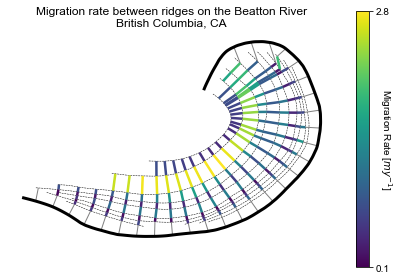

In [37]:
itx_lines = itx.sjoin(mega_sub_gdf).set_geometry("2v_geometry")

fig, ax = plt.subplots(figsize=(6,4))

ridges.plot(ax=ax, color="k", ls="--", lw=0.5)

rich_transects.plot(ax=ax, color="grey", lw=1)
itx_lines.plot(ax=ax, column="pre_mig_rate",lw=2.5, zorder=2,legend=True)
centerline.plot(ax=ax, color="k", lw=3)

cbar = fig.axes[1]
tick_locs = itx_lines["pre_mig_rate"].quantile([0,1])
cbar.set_yticks(tick_locs, labels=np.round(tick_locs, 1))
cbar.set_ylabel("Migration Rate [$my^{-1}$]", rotation=270)

ax.set_axis_off()
ax.set_title("Migration rate between ridges on the Beatton River\nBritish Columbia, CA")
plt.tight_layout()
plt.savefig("/Users/avan/FLUD/BrazosScrolls/figures/MigrationRateLines_BEA_002.png", dpi=300)

<AxesSubplot:xlabel='transect_id'>

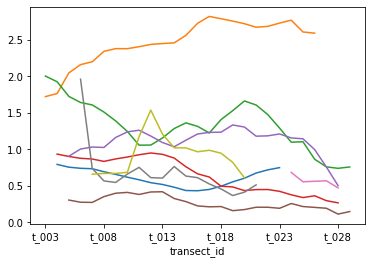

In [13]:
# Make each column a ridge
itx_lines.loc[bend_id, "pre_mig_rate"].unstack().plot(legend=False)

In [14]:
itx_lines.loc[bend_id, "pre_mig_rate"].unstack()

ridge_id,r_001,r_002,r_003,r_004,r_005,r_006,r_007,r_008,r_009,r_010
transect_id,,,,,,,,,,
t_003,NaN,1.719182,2.000172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t_004,0.791949,1.761277,1.922600,0.932926,NaN,NaN,NaN,NaN,NaN,NaN
t_005,0.753984,2.043452,1.722498,0.900307,0.903721,0.304054,NaN,NaN,NaN,NaN
t_006,0.738441,2.156454,1.638961,0.875450,1.002101,0.274451,NaN,1.957974,NaN,NaN
t_007,0.732667,2.196257,1.605432,0.865472,1.029387,0.271884,NaN,0.737195,0.656771,NaN
t_008,0.691645,2.338204,1.507882,0.832776,1.024015,0.351168,NaN,0.565590,0.668104,NaN
t_009,0.655244,2.375732,1.386772,0.866735,1.160095,0.397568,NaN,0.545032,0.668790,NaN
t_010,0.616937,2.375053,1.242234,0.892836,1.237053,0.408911,NaN,0.659010,0.683460,NaN
t_011,0.581587,2.402077,1.054659,0.924084,1.259281,0.380603,NaN,0.751582,1.171726,NaN


In [15]:
itx_lines.loc[bend_id, ["pre_mig_rate"]].groupby(level=-1).agg("median").sort_values("pre_mig_rate")

,pre_mig_rate
ridge_id,
r_006,0.223907
r_007,0.561058
r_008,0.607343
r_001,0.609843
r_004,0.662949
r_009,0.955000
r_005,1.156952
r_003,1.312436
r_002,2.505802


<AxesSubplot:>

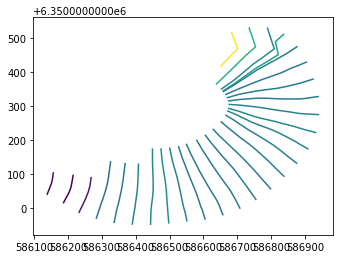

In [34]:
mig_rate_trans_mean = itx_lines.loc["BEA_002", "pre_mig_rate"].groupby(level=0).mean()

transects_w_mig_rate = transects.set_index("transect_id").join(mig_rate_trans_mean)
transects_w_mig_rate.plot(column="pre_mig_rate")

<AxesSubplot:>

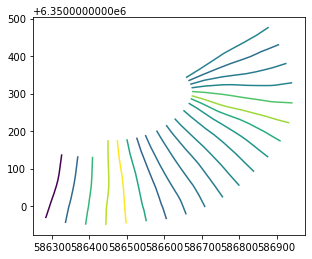

In [31]:
transects_w_mig_rate.loc["t_007":"t_026"].plot(column="pre_mig_rate")

<AxesSubplot:xlabel='transect_id'>

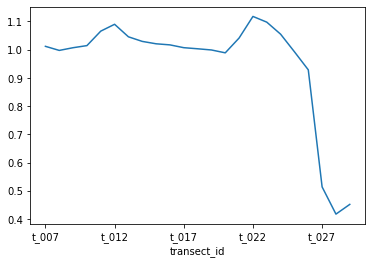

In [33]:
transects_w_mig_rate.loc["t_007":, "pre_mig_rate"].plot()